In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/purzelrakete/src/github.com/feldberlin/wavenet


In [2]:
import os

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import wandb

from wavenet import model, train, sample, audio, datasets, utils, viz

# Generate waveforms

Generate using a learned model. Use the currently best decoder, nucleus sampling.

In [3]:
m, ptrain = sample.load('purzelrakete/feldberlin-wavenet/3m0xq7hr')
m.cfg.sample_from_gpu = True

In [4]:
_, tracks = sample.sample(m, decoder=utils.decode_nucleus(0.15), n_samples=16000, batch_size=15)

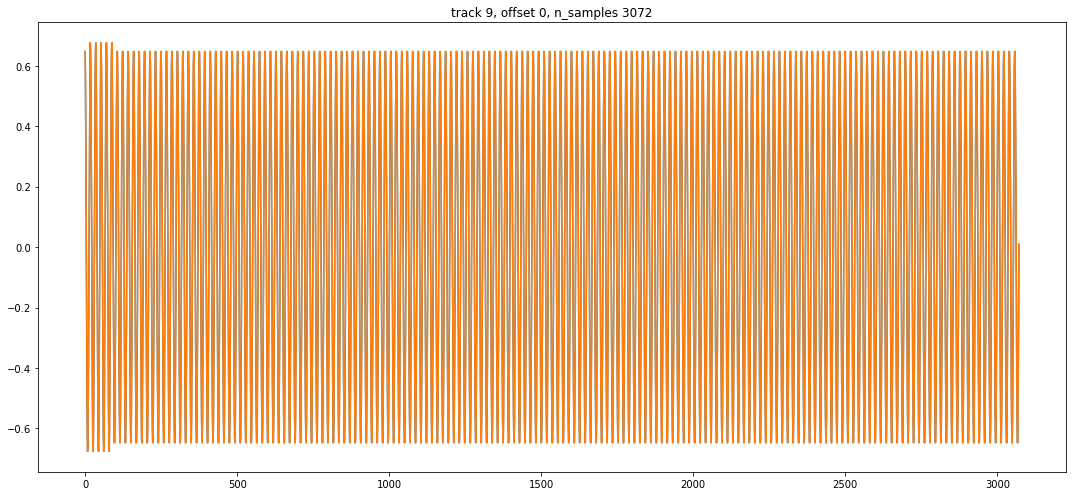

In [7]:
track_i = viz.plot_track(tracks, n_samples=m.cfg.receptive_field_size())

In [10]:
for t in tracks:
    display(ipd.Audio(audio.mu_expand(t, m.cfg), rate=m.cfg.sampling_rate))